# Try different zooms position

 - We want to keep the cost of zooms(s) at 1/24° to be as costly as the parent config.
 - Parent config : 160°x50°
 - example of zoom : 80°x25° or 2 zooms 40°x25° 

In [1]:
## imports

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

#- Other modules
import os
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da
from netCDF4 import Dataset

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormap as cmaps
import matplotlib.cm as cm

import seaborn as sns

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

%matplotlib inline

In [2]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-I/NACHOS12.L75_bathymetry_20S_80N_nfrontiercleaned_repeat3_retouchbalt.nc"

ds=xr.open_dataset(file)

curl15=ds.Bathymetry

navlat=ds.nav_lat
navlon=ds.nav_lon


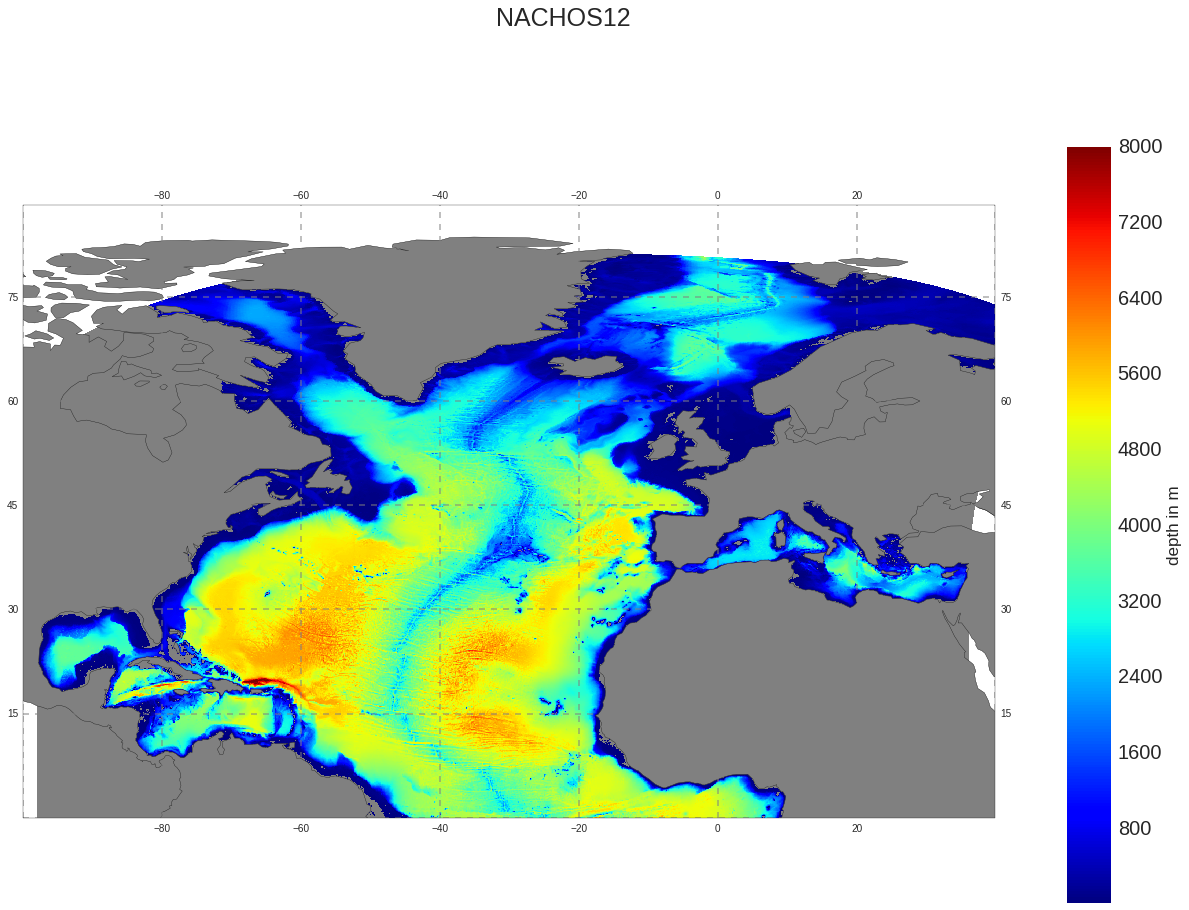

In [4]:

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax1.set_extent([-100, 40, 0, 85])
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax1.pcolormesh(navlon,navlat,np.nan_to_num(curl15),transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax1.add_feature(cfeature.LAND,facecolor='grey')
ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar=fig.colorbar(pcolor, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)
cbar.set_label("depth in m",size=17)

fig.suptitle("NACHOS12", fontsize=25)


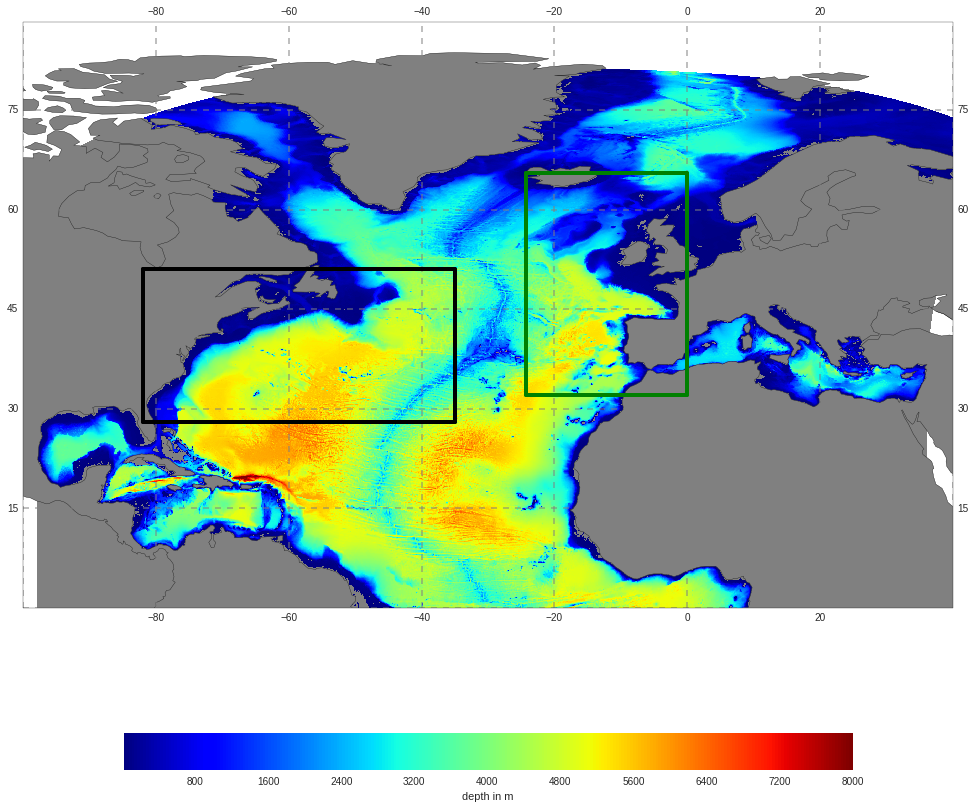

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax1.set_extent([-100, 40, 0, 85])
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax1.pcolormesh(navlon,navlat,np.nan_to_num(curl15),transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax1.add_feature(cfeature.LAND,facecolor='grey')
ax1.coastlines()
ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

lon1, lat1 = -82, 28
lon2, lat2 = -35, 50

plt.plot([lon1, lon2], [lat1, lat1],
         color='black', linewidth=4,
         transform=ccrs.PlateCarree(),
         )
plt.plot([lon1, lon2], [lat2, lat2],
         color='black', linewidth=4,
         transform=ccrs.PlateCarree(),
         )
plt.plot([lon1, lon1], [lat1, lat2],
         color='black', linewidth=4,
         transform=ccrs.PlateCarree(),
         )
plt.plot([lon2, lon2], [lat1, lat2],
         color='black', linewidth=4,
         transform=ccrs.PlateCarree(),
         )

zlon1, zlat1 = -24.25, 32
zlon2, zlat2 = -0, 65.5

plt.plot([zlon1, zlon2], [zlat1, zlat1],
         color='green', linewidth=4,
         transform=ccrs.PlateCarree(),
         )
plt.plot([zlon1, zlon2], [zlat2, zlat2],
         color='green', linewidth=4,
         transform=ccrs.PlateCarree(),
         )
plt.plot([zlon1, zlon1], [zlat1, zlat2],
         color='green', linewidth=4,
         transform=ccrs.PlateCarree(),
         )
plt.plot([zlon2, zlon2], [zlat1, zlat2],
         color='green', linewidth=4,
         transform=ccrs.PlateCarree(),
         )

fig.subplots_adjust(right=0.8)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='depth in m')

plt.savefig('zooms.png')
